<a href="https://colab.research.google.com/github/GustavoHDLC1/Colab_Files_PADP/blob/main/Sem1_Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  "Extracción de Información con Expresiones Regulares".

**Objetivo:** \
Diseñar un código en Google Colab que permita a los estudiantes cargar el archivo informe_acciones.txt y extraer información clave utilizando expresiones regulares en Python.

[Enlace GitHub](https://github.com/GustavoHDLC1/Colab_Files_PADP/blob/main/Sem1_Practica2.ipynb)

In [1]:
from google.colab import files
import re
import pandas as pd

## Ejemplo Carga de Archivo
A continuación se muestran los pasos necesarios para cargar el archivo requerido para este ejercicio

Paso 1: Ejecutar la siguiente celada
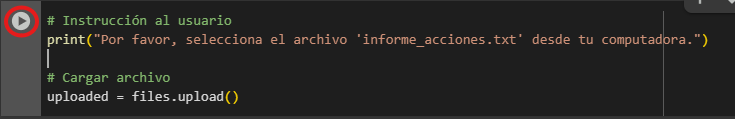

Paso 2: Dar clic en la opción "Elegir Archivos"
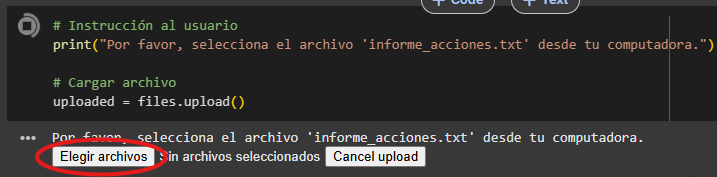

Paso 3: Seleccionar el archivo "informe_acciones.txt" desde la ruta donde se encuentre
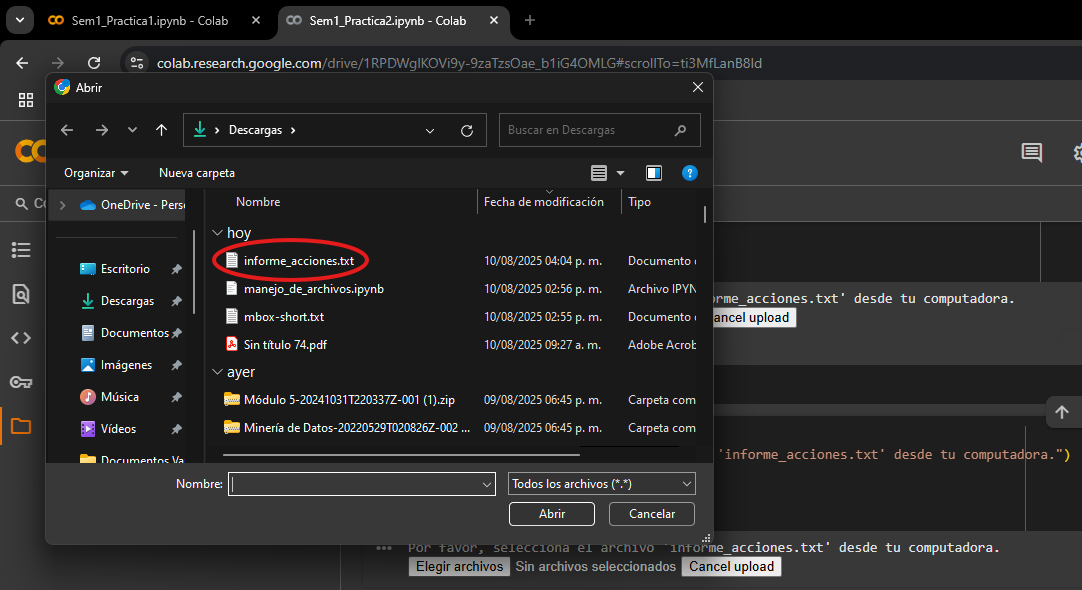

## Código

In [2]:
# Instrucción al usuario
print("Por favor, selecciona el archivo 'informe_acciones.txt' desde tu equipo local.")

# Cargar archivo
uploaded = files.upload()

Por favor, selecciona el archivo 'informe_acciones.txt' desde tu equipo local.


Saving informe_acciones.txt to informe_acciones (2).txt


In [3]:
# Leer archivo
with open("informe_acciones.txt", "r", encoding="latin-1") as f:
    contenido = f.read()

In [4]:
# Patrones
patron_bloque = re.compile(
    r"acción de (.+?)\s*\(.*?\).*?Fecha:\s*(\d{4}-\d{2}-\d{2}).*?Valor actual:\s*\$?([0-9]+\.[0-9]+)",
    re.DOTALL | re.IGNORECASE
)

In [5]:
# Diccionario para guardar datos
datos = {}

In [6]:
for match in patron_bloque.finditer(contenido):
    empresa = match.group(1).strip()
    fecha = match.group(2)
    valor = float(match.group(3))

    if empresa not in datos:
        datos[empresa] = []
    datos[empresa].append((fecha, valor))

In [7]:
resultados = []

In [8]:
for empresa, registros in datos.items():
    registros.sort(key=lambda x: x[0], reverse=True)
    fechas, valores = zip(*registros)

    fecha_mas_reciente = fechas[0]
    valor_max = max(valores)
    valor_min = min(valores)
    promedio = sum(valores) / len(valores)

    resultados.append({
        "Empresa": empresa,
        "Fecha más reciente": fecha_mas_reciente,
        "Valor Máx ($)": round(valor_max, 2),
        "Valor Mín ($)": round(valor_min, 2),
        "Promedio ($)": round(promedio, 2)
    })

In [9]:
# Convertir a DataFrame para mostrar tabla
df = pd.DataFrame(resultados)

In [10]:
df

,Empresa,Fecha más reciente,Valor Máx ($),Valor Mín ($),Promedio ($)
0,Cisco Systems Inc.,2024-09-02,1499.73,104.72,794.88
1,Amazon.com Inc.,2024-09-02,1498.27,103.83,762.75
2,NVIDIA Corporation,2024-09-02,1496.06,103.26,806.61
3,"Merck & Co., Inc.",2024-09-02,1495.62,102.43,804.27
4,Microsoft Corp.,2024-09-02,1494.97,104.05,819.01
5,The Home Depot Inc.,2024-09-02,1490.53,101.10,798.42
6,Salesforce.com Inc.,2024-09-02,1497.80,106.33,816.63
7,Exxon Mobil Corporation,2024-09-02,1498.51,104.62,822.57
8,MasterCard Inc.,2024-09-02,1499.99,102.26,802.10
9,Intel Corporation,2024-09-02,1489.20,103.85,782.32
